In [1]:
#### Import
import pandas as pd 
pd.set_option('display.max_columns',500)

# from autoviz.AutoViz_Class import AutoViz_Class
# %matplotlib inline

# import sweetviz

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go



In [2]:
### Read Data

df = pd.read_excel('e-shop clothing 2008_new.xlsx')
df.head(2)

,Year,Month,Day,Date,Order,CountryCode,SessionId,PageCategoryID,Page(ClothingModel),ColorId,LocationId,model photography,Price,PriceGreaterThanAvgPrice,PageNo,Purchased,CustId
0,2008,4,1,2008-4-1,1,29,1,1,A13,1,5,en face,28,No,1,Yes,Cust_13885
1,2008,4,1,2008-4-1,2,29,1,1,A16,1,6,en face,33,No,1,Yes,Cust_13885


In [3]:
# viz = AutoViz_Class() 
# viz_df = viz.AutoViz(filename = '',dfte= df, verbose =1)

<AxesSubplot: >

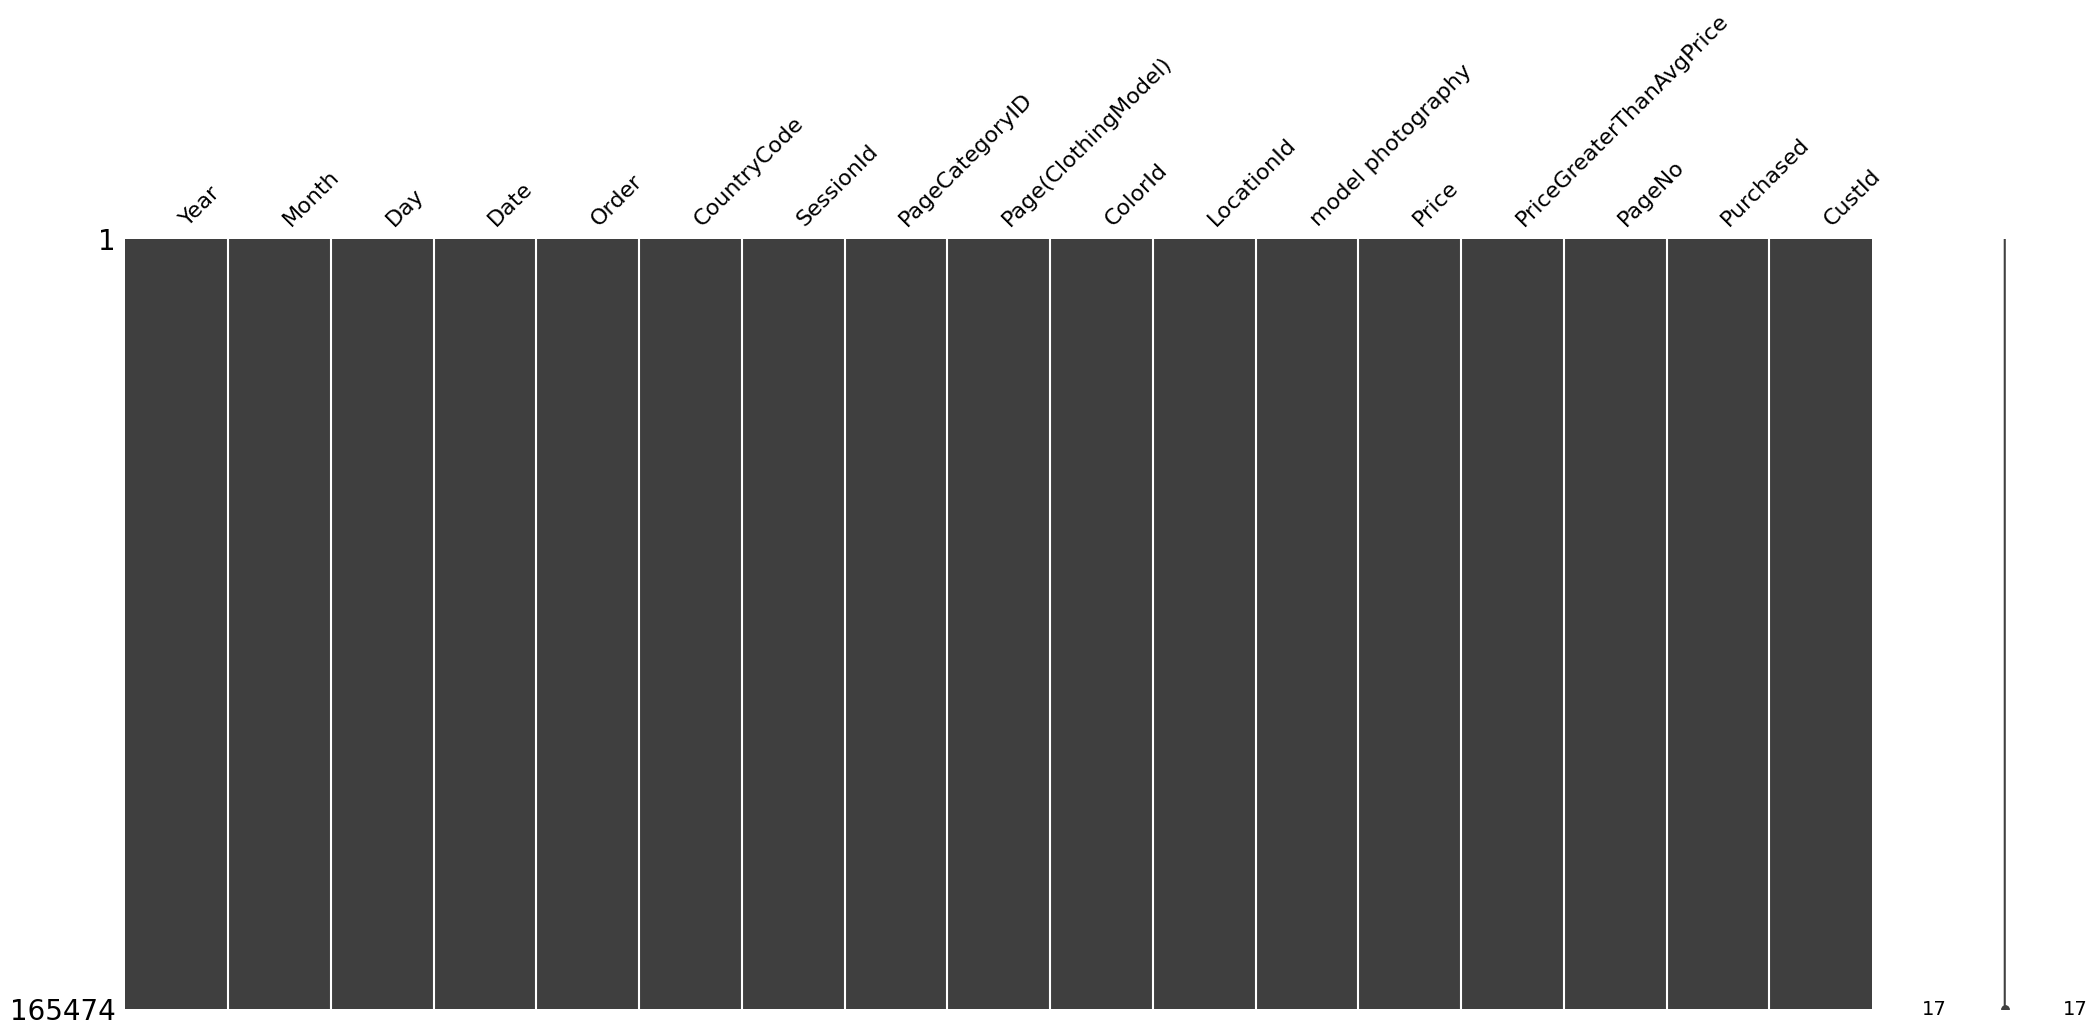

In [4]:
#### Missing data

msno.matrix(df)

In [5]:
### Other dfs

Colors_df = pd.read_excel('Colors.xlsx')
Countries_df = pd.read_excel('Countries.xlsx')
Customers_df = pd.read_excel('CustomerData.xlsx')
PageCategory_df = pd.read_excel('PageNo.xlsx')
Location_df = pd.read_excel('Location.xlsx')

In [6]:
Colors_df.head(2)

,ColorId,ColorName
0,1,beige
1,2,black


In [7]:
df = pd.merge(Colors_df, df, on = ['ColorId'], how = 'inner')
df = pd.merge(Countries_df, df, on = ['CountryCode'], how = 'inner')
df = pd.merge(Customers_df, df, on = ['CustId'], how = 'inner')
df = pd.merge(PageCategory_df, df, on = ['PageCategoryID'], how = 'inner')
df = pd.merge(Location_df, df, on = ['LocationId'], how = 'inner')

In [8]:
test = df.groupby(['CustId'])['CountryName'].nunique().reset_index()
test[test['CountryName'] > 1] 

,CustId,CountryName


In [9]:
df.head(2)

,LocationId,Location,PageCategoryID,PageCategory,Unnamed: 0,CustId,Age,CountryCode,CountryName,ColorId,ColorName,Year,Month,Day,Date,Order,SessionId,Page(ClothingModel),model photography,Price,PriceGreaterThanAvgPrice,PageNo,Purchased
0,1,top left,1,trousers,0,Cust_13885,38,29,Poland,3,blue,2008,4,19,2008-4-19,7,4708,A3,en face,72,Yes,1,Yes
1,1,top left,1,trousers,3,Cust_19586,12,21,Ireland,2,black,2008,4,1,2008-4-1,2,4,A37,en face,62,Yes,3,Yes


In [10]:
##### converting into float
## df['Order'] = df['Order'].astype(str)
## df['PageNo'] = df['PageNo'].astype(str)
## df['SessionId'] = df['SessionId'].astype(str)


### sorting columns
df = df[[ 'SessionId', 'Location', 'PageCategory', 'CustId',
       'Age', 'CountryName', 'ColorName',
       'Year', 'Month', 'Day', 'Date', 'Order',
       'Page(ClothingModel)', 'model photography', 'Price',
       'PriceGreaterThanAvgPrice', 'PageNo', 'Purchased']]


df = df.sort_values(by = ['SessionId','Order'], ascending=True).reset_index(drop=True)
df.head(2)

,SessionId,Location,PageCategory,CustId,Age,CountryName,ColorName,Year,Month,Day,Date,Order,Page(ClothingModel),model photography,Price,PriceGreaterThanAvgPrice,PageNo,Purchased
0,1,bottom in the middle,trousers,Cust_13885,38,Poland,beige,2008,4,1,2008-4-1,1,A13,en face,28,No,1,Yes
1,1,bottom right,trousers,Cust_13885,38,Poland,beige,2008,4,1,2008-4-1,2,A16,en face,33,No,1,Yes


In [11]:
######## save data

df.rename(columns = {'Page(ClothingModel)':'Page_ClothingModel',
                    'model photography':'ModelPhotography'}, inplace=True)


df['Purchased'] = df['Purchased'].map({'Yes': True, 'No': False})
df['PriceGreaterThanAvgPrice'] = df['PriceGreaterThanAvgPrice'].map({'Yes': True, 'No': False})

df[['SessionId','Location', 'PageCategory', 'CustId',
       'Age', 'CountryName', 'ColorName',
        'Date', 'Order',
       'Page_ClothingModel', 'ModelPhotography', 'Price',
       'PriceGreaterThanAvgPrice', 'PageNo', 'Purchased']].reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165611 entries, 0 to 165610
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   SessionId                 165611 non-null  int64 
 1   Location                  165611 non-null  object
 2   PageCategory              165611 non-null  object
 3   CustId                    165611 non-null  object
 4   Age                       165611 non-null  int64 
 5   CountryName               165611 non-null  object
 6   ColorName                 165611 non-null  object
 7   Date                      165611 non-null  object
 8   Order                     165611 non-null  int64 
 9   Page_ClothingModel        165611 non-null  object
 10  ModelPhotography          165611 non-null  object
 11  Price                     165611 non-null  int64 
 12  PriceGreaterThanAvgPrice  165611 non-null  bool  
 13  PageNo                    165611 non-null  int64 
 14  Purc

In [12]:
###### save data

df[['SessionId','Location', 'PageCategory', 'CustId',
       'Age', 'CountryName', 'ColorName',
        'Date', 'Order',
       'Page_ClothingModel', 'ModelPhotography', 'Price',
       'PriceGreaterThanAvgPrice', 'PageNo', 'Purchased']].reset_index(drop=True).to_csv('ClickStream_DataSave.csv')

In [ ]:
df.info()

In [ ]:
df['PriceGreaterThanAvgPrice'].value_counts()

In [ ]:
df['Purchased'].value_counts()

In [ ]:
df['SessionId'].min(), df['SessionId'].max()